In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import seawater as sw
from seawater.library import T90conv
from scipy import stats

import ncar_jobqueue
from dask.distributed import Client

Note: this notebook uses annual means for all 5 IAFs.

These means were made using this notebook:
/glade/u/home/kristenk/besome/alk-calc_transient_response/make_annual_mean_tseries.ipynb

### get ALK control

In [2]:
case='cesm22cocco.G1850ECOIAF.T62_g17.003'

In [3]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK.0001-0062.nc'
ds_1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [4]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK.0063-0124.nc'
ds_2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [5]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK.0125-0186.nc'
ds_3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [6]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK.0187-0248.nc'
ds_4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [7]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK.0249-0310.nc'
ds_5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [8]:
ds_alk = xr.concat([ds_1, ds_2, ds_3, ds_4, ds_5], 'time')

### get ALK noGCB

In [9]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0001-0062.nc'
ds_1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [10]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0063-0124.nc'
ds_2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [11]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0125-0186.nc'
ds_3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [12]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0187-0248.nc'
ds_4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [13]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0249-0310.nc'
ds_5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [14]:
ds_alk_noGCB = xr.concat([ds_1, ds_2, ds_3, ds_4, ds_5], 'time')

### get ALK with 2x GCB

In [15]:
case='cesm22cocco.G1850ECOIAF.T62_g17.004'

In [16]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0001-0062.nc'
ds_1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [17]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0063-0124.nc'
ds_2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [18]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0125-0186.nc'
ds_3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [19]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0187-0248.nc'
ds_4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [20]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0249-0310.nc'
ds_5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [21]:
ds_alk_2xGCB = xr.concat([ds_1, ds_2, ds_3, ds_4, ds_5], 'time')

### get ALK with 100m dissolution length scale

In [22]:
case='cesm22cocco.G1850ECOIAF.T62_g17.009'

In [23]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0001-0062.nc'
ds_1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [24]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0063-0124.nc'
ds_2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [25]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0125-0186.nc'
ds_3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [26]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0187-0248.nc'
ds_4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [27]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0249-0310.nc'
ds_5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [28]:
ds_alk_100mDLS = xr.concat([ds_1, ds_2, ds_3, ds_4, ds_5], 'time')

### get ALK with 1000m dissolution 

In [29]:
case='cesm22cocco.G1850ECOIAF.T62_g17.010'

In [30]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0001-0062.nc'
ds_1 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [31]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0063-0124.nc'
ds_2 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [32]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0125-0186.nc'
ds_3 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [33]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0187-0248.nc'
ds_4 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [34]:
file='/glade/scratch/kristenk/archive/'+case+'/ocn/proc/tseries/year_1/'+case+'.annual.ALK_ALT_CO2.0249-0310.nc'
ds_5 = xr.open_dataset(file,decode_times=False,decode_coords=False)

In [35]:
ds_alk_1000mDLS = xr.concat([ds_1, ds_2, ds_3, ds_4, ds_5], 'time')

### Now we have everything we need

In [36]:
file = '/glade/work/kristenk/WOA_data/regrid_POP/WOA2013_POPgrid.nc' 
ds_woa = xr.load_dataset(file, decode_times=False, decode_coords=False)
ds_woa['z_t'] = ds_alk.z_t

In [37]:
lons=ds_woa.TLONG
lats=ds_woa.TLAT
area=ds_woa.TAREA
area_m=ds_woa.TAREA * 1e-4
depths_m=ds_woa.z_t * 0.01
dz=ds_woa.dz
dz_m=ds_woa.dz * 0.01

### Total up ALK control

In [38]:
%%time
glb_ALK_ts = esmlab.weighted_sum(ds_alk.ALK, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_ALK_ts = esmlab.weighted_sum(glb_ALK_ts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_ALK_ts = glb_ALK_ts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 29.4 s, sys: 1min 25s, total: 1min 55s
Wall time: 2min 56s


### Total up ALK noGCB

In [39]:
%%time
glb_ALK_noGCBts = esmlab.weighted_sum(ds_alk_noGCB.ALK_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_ALK_noGCBts = esmlab.weighted_sum(glb_ALK_noGCBts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_ALK_noGCBts = glb_ALK_noGCBts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 28 s, sys: 59.2 s, total: 1min 27s
Wall time: 2min 47s


### Total up ALK 2xGCB

In [40]:
%%time
glb_ALK_2xGCBts = esmlab.weighted_sum(ds_alk_2xGCB.ALK_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_ALK_2xGCBts = esmlab.weighted_sum(glb_ALK_2xGCBts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_ALK_2xGCBts = glb_ALK_2xGCBts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 28.7 s, sys: 54.7 s, total: 1min 23s
Wall time: 2min 42s


### Total up ALK 100m DLS

In [41]:
%%time
glb_ALK_100mDLSts = esmlab.weighted_sum(ds_alk_100mDLS.ALK_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_ALK_100mDLSts = esmlab.weighted_sum(glb_ALK_100mDLSts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_ALK_100mDLSts = glb_ALK_100mDLSts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 28.7 s, sys: 58.4 s, total: 1min 27s
Wall time: 2min 48s


### Total up ALK 1000m DLS

In [42]:
%%time
glb_ALK_1000mDLSts = esmlab.weighted_sum(ds_alk_1000mDLS.ALK_ALT_CO2, weights=area_m, dim=['nlat', 'nlon']).compute()
#dims: z_t, time
glb_ALK_1000mDLSts = esmlab.weighted_sum(glb_ALK_1000mDLSts, weights=dz_m, dim=['z_t']).compute()
#dims: time
glb_ALK_1000mDLSts = glb_ALK_1000mDLSts * 0.001 * 1.e-15 #mmol to Pmol
#glb_DIC_ts1 

CPU times: user 28.4 s, sys: 56.6 s, total: 1min 25s
Wall time: 2min 37s


In [43]:
years=np.arange(1,311,1)
years = xr.DataArray(years,dims='time')

#### Plot a timeseries of ALK inventory

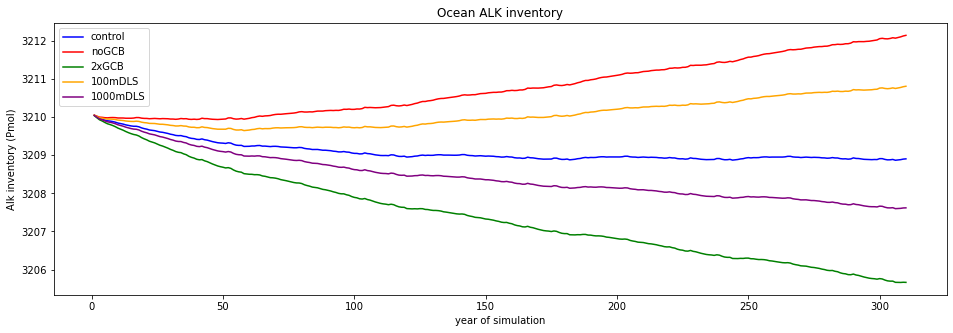

In [44]:
fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Ocean ALK inventory')

ax.plot(years,glb_ALK_ts,color='blue', label='control')
ax.plot(years,glb_ALK_noGCBts,color='red', label='noGCB')
ax.plot(years,glb_ALK_2xGCBts,color='green', label='2xGCB')
ax.plot(years,glb_ALK_100mDLSts,color='orange', label='100mDLS')
ax.plot(years,glb_ALK_1000mDLSts,color='purple', label='1000mDLS')

ax.set(ylabel='Alk inventory (Pmol)',xlabel='year of simulation')
ax.legend()

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_ALK_ts.isel(time=slice(186,310)))
slope

-0.0003500540892595543

In [65]:
line_alk_control = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_alk_control[t] = slope * i + intercept
    t=t+1

In [66]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_ALK_noGCBts.isel(time=slice(186,310)))
slope

0.00967252517582719

In [67]:
line_alk_noGCB = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_alk_noGCB[t] = slope * i + intercept
    t=t+1

In [68]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_ALK_2xGCBts.isel(time=slice(186,310)))
slope

-0.010372654371647319

In [69]:
line_alk_2xGCB = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_alk_2xGCB[t] = slope * i + intercept
    t=t+1

In [70]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_ALK_100mDLSts.isel(time=slice(186,310)))
slope

0.005607156241037711

In [71]:
line_alk_100mDLS = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_alk_100mDLS[t] = slope * i + intercept
    t=t+1

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(years.isel(time=slice(186,310)),glb_ALK_1000mDLSts.isel(time=slice(186,310)))
slope

-0.004635118833758652

In [73]:
line_alk_1000mDLS = np.empty([124])
t=0
for i in np.arange(186,310,1):
    line_alk_1000mDLS[t] = slope * i + intercept
    t=t+1

In [74]:
yr_2iaf=years.isel(time=slice(186,310))

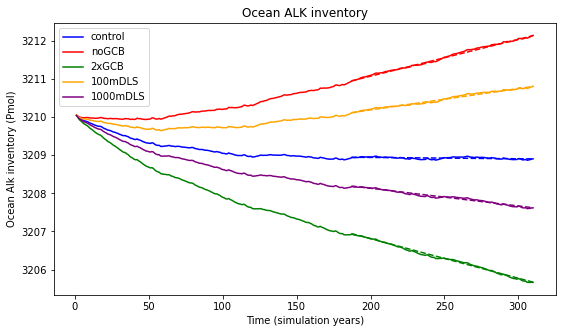

In [79]:
fig = plt.figure(figsize=(9,5))


ax = fig.add_subplot(1,1,1)
ax.set_title('Ocean ALK inventory')

ax.plot(years,glb_ALK_ts,color='blue', label='control')
ax.plot(yr_2iaf,line_alk_control,'--',color='blue')

ax.plot(years,glb_ALK_noGCBts,color='red', label='noGCB')
ax.plot(yr_2iaf,line_alk_noGCB,'--',color='red')

ax.plot(years,glb_ALK_2xGCBts,color='green', label='2xGCB')
ax.plot(yr_2iaf,line_alk_2xGCB,'--',color='green')

ax.plot(years,glb_ALK_100mDLSts,color='orange', label='100mDLS')
ax.plot(yr_2iaf,line_alk_100mDLS,'--',color='orange')

ax.plot(years,glb_ALK_1000mDLSts,color='purple', label='1000mDLS')
ax.plot(yr_2iaf,line_alk_1000mDLS,'--',color='purple')

ax.set(ylabel='Ocean Alk inventory (Pmol)',xlabel='Time (simulation years)')
ax.legend()

fig.savefig('/glade/u/home/kristenk/besome/alk_calc_paper/Figs/ALK_inventory_tseries.pdf', bbox_inches='tight', format='pdf');
